In [1]:
!git clone https://github.com/nayeho/robot

Cloning into 'robot'...


In [4]:
# 나중에 진행 할 폐암 수술 환자의 생존율 예측 코드
from tensorflow.keras.models import Sequential # Keras에서 필요한 함수들 호출
from tensorflow.keras.layers import Dense      # 데이터 관련 라이브러리
import numpy as np
import pandas as pd

# 폐암 수술 환자 데이터 load
Data_set = np.loadtxt("robot/data/ThoraricSurgery3.csv", delimiter=",")
df = pd.DataFrame(Data_set)

X = Data_set[ : , : 16]
y = Data_set[ : , 16]

# 딥러닝 모델 설정
model = Sequential() # 딥 러닝 모델 구조 결정
model.add(Dense(30, input_dim=16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 학습
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=50, batch_size=16)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1489 - loss: 15.9116
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1489 - loss: 8.3078  
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2957 - loss: 2.1468 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8319 - loss: 0.5237 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4730
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4624 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.4602
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4595
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4575
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4569 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4544 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8

In [14]:
# 오늘의 목표
# 가능하다면 딥러닝 로직을 손수 구현

# 층을 쌓기 위해 회귀, 로지스틱 회귀 구현

# 공부한 시간에 따른 성적 관현 모델 구축
X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 7시간 공부하면 몇 점 받을 수 있는지?
# 85점을 받으려면 몇 시간 공부하면 되는지?

mean_X = np.mean(X)
mean_y = np.mean(y)
print(mean_X, mean_y)

# 기울기 구하기 
# 분모
divisor = 0

# 다른 방식
# for element in X:
#     divisor += (element - mean_X) ** 2

divisor = sum((x - mean_X) ** 2 for x in X)
print("분모 :", divisor)

# 분자
divided = sum((i - mean_X) * (j - mean_y) for (i, j) in zip(X, y))
print("분자 :", divided)

# 기울기 a
a = divided / divisor
print("기울기 :", a)

# y 절편 b
b = mean_y - (mean_X * a)
print("y절편 :", b)

5.0 90.5
분모 : 20.0
분자 : 46.0
기울기 : 2.3
y절편 : 79.0


In [8]:
# 1부터 100까지의 합을 total에 누적시켜서 출력
total = 0
for i in range(1, 101):


    
    total += i

total2 = sum(i for i in range(1, 101))
print(total2)

5050


In [21]:
# 우리의 모델로 오차를 측정해보자
def predict(X):
    y_pred = a * X + b
    return y_pred
predict_list = []
for x in X:
    y_pred = predict(x)
    predict_list.append(y_pred)
print(predict_list)

# 오차 : 실제 값 - 예측 값
# 오차 제곱 합

total = sum((y_real - y_pred) ** 2 for (y_real, y_pred) in zip(y, predict_list))
print(total)

# MSE (Mean Square Error)
MSE = total / len(X)
print("오차 제곱 합 :", MSE)

# 실제 값과 예측 값이 얼마나 떨어져 있는지 정도
# MSE가 줄면 더 좋은 예측이다
# 어떻게 오차를 줄여 나가야 할 것인가?

[np.float64(83.6), np.float64(88.2), np.float64(92.8), np.float64(97.4)]
33.19999999999994
오차 제곱 합 : 8.299999999999985


In [29]:
# a, b, X, y가 정의되어 있어야 함!!
a = divided / divisor # 2.3
b = mean_y - (mean_X * a) # 79.0

def predict(X, a, b):
    y_pred = a * X + b
    return y_pred

# MSE 구하는 함수 정의
def MSE(X, y, a, b):
    predict_list = []
    for x in X:
        y_pred = predict(x, a, b)
        predict_list.append(y_pred)

    total = sum((y_real - y_pred) ** 2 for (y_real, y_pred) in zip(y, predict_list))

    result = total / len(X)
    return result

print(MSE(X, y, a, b))
# 만약, a가 3이면 MSE가 어떻게 되는지?
print(MSE(X, y, 3, b))
print(MSE(X, y, 2, b))
print(MSE(X, y, 2.2, b))
print(MSE(X, y, 2.3, b))

8.299999999999985
23.0
11.0
8.600000000000017
8.299999999999985


In [47]:
# 경사 하강법 : 편미분해서 오차를 확인하고 기울기를 수정해 나가는 방식

a, b = 0, 0  # 초반 값 모름
lr = 0.03    # 학습률(learning rate)
epochs = 1000 # 학습을 100번 진행하겠다

for i in range(1, epochs + 1):
    n = len(X)
    a_diff = -(2 / n) * sum(x_i * (y_i - (a * x_i + b)) for (x_i, y_i) in zip(X, y))
    b_diff = -(2 / n) * sum(y_i - (a * x_i + b) for (x_i, y_i) in zip(X, y))
    if i % 100 == 0:
        print(f"epochs : {i}, 기울기 : {a}, y절편 : {b}")
    
    # 편미분 값이 0을 향하도록 a, b를 수정
    a = a - lr * a_diff
    b = b - lr * b_diff

# a_diff = -(2 / n) * sum(x_i * (y_i - (a * x_i + b)) for (x_i, y_i) in zip(X, y))
# b_diff = -(2 / n) * sum(y_i - (a * x_i + b) for (x_i, y_i) in zip(X, y))
# print(a_diff, b_diff)


epochs : 100, 기울기 : 7.168115109996344, y절편 : 49.94918081964135
epochs : 200, 기울기 : 4.1314600407292446, y절편 : 68.0706297373792
epochs : 300, 기울기 : 2.989023762004365, y절편 : 74.88820086312575
epochs : 400, 기울기 : 2.5592214594087714, y절편 : 77.45307719148077
epochs : 500, 기울기 : 2.3975231461140605, y절편 : 78.41802357171171
epochs : 600, 기울기 : 2.336689724877233, y절편 : 78.781051413026
epochs : 700, 기울기 : 2.313803245334121, y절편 : 78.91762813507938
epochs : 800, 기울기 : 2.3051929956518156, y절편 : 78.96901042283822
epochs : 900, 기울기 : 2.3019536857591842, y절편 : 78.9883412389219
epochs : 1000, 기울기 : 2.3007350069789276, y절편 : 78.99561379269015


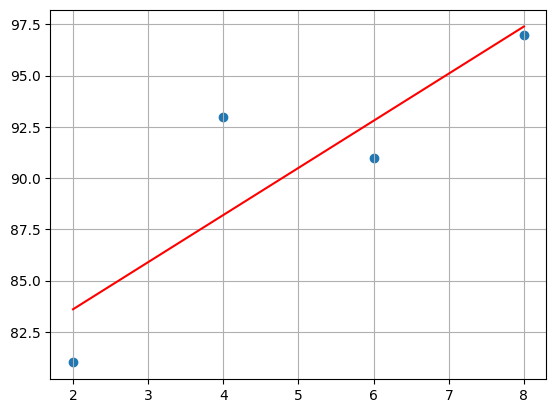

In [53]:
# 그래프를 그려보자

import matplotlib.pyplot as plt
y_model = a * X + b
plt.scatter(X, y)
plt.grid(True)
plt.plot(X, y_model, "r")
plt.show()

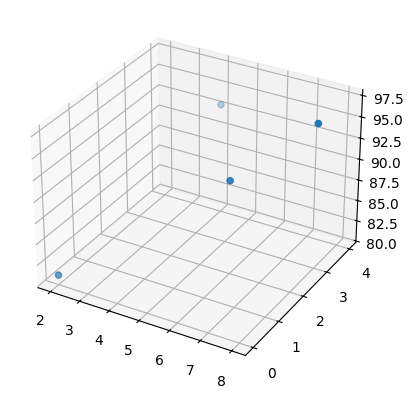

In [55]:
# 다중 선형 회귀 (multiple linear regression)
# 에서 경사 하강법으로 a1, a2, b 구해보자
X1 = np.array([2, 4, 6, 8]) # 공부 시간
X2 = np.array([0, 4, 2, 3]) # 과외 횟수
y = np.array([81, 93, 91, 97]) # 성적

# 3차원으로 그래프로 그려보자
fig = plt.figure() # 그래프 그릴 도화지
graph = fig.add_subplot(111, projection="3d") # 1행 1열 1번째에 3d로 그리겠다
graph.scatter3D(X1, X2, y)
plt.show()

In [70]:
# 학습을 위한 기본 설정
# 경사하강법
a1, a2, b = 0, 0, 0 # 모름...
lr = 0.01 # 일단 학습률은 작게 출발

epochs = 10000

for i in range(1, epochs + 1):
    y_pred = a1 * X1 + a2 * X2 + b
    error = y - y_pred
    
    a1_diff = -(2 / n) * sum(x1_i * (e) for (x1_i, e) in zip(X1, error))
    a2_diff = -(2 / n) * sum(x2_i * (e) for (x2_i, e) in zip(X2, error))
    b_diff = -(2 / n) * sum(e for e in error)
    
    if i % 1000 == 0:
        print(f"epochs : {i}, a1 : {a1} a2 : {a2}, b : {b}")

    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b = b - lr * b_diff

epochs : 1000, a1 : 1.9612402046360067 a2 : 2.4449700918579795, b : 74.69026942393315
epochs : 2000, a1 : 1.5192279722172837 a2 : 2.2923532694481485, b : 77.7251236754293
epochs : 3000, a1 : 1.500801566975022 a2 : 2.2859910486536457, b : 77.85163930144103
epochs : 4000, a1 : 1.5000334153600983 a2 : 2.285725823282035, b : 77.85691342741168
epochs : 5000, a1 : 1.5000013930043632 a2 : 2.285714766687173, b : 77.85713329278038
epochs : 6000, a1 : 1.5000000580709223 a2 : 2.2857143057648606, b : 77.85714245842814
epochs : 7000, a1 : 1.500000002420847 a2 : 2.2857142865501507, b : 77.85714284052133
epochs : 8000, a1 : 1.5000000001009228 a2 : 2.2857142857491315, b : 77.85714285644993
epochs : 9000, a1 : 1.500000000004211 a2 : 2.2857142857157386, b : 77.85714285711394
epochs : 10000, a1 : 1.500000000000318 a2 : 2.285714285714393, b : 77.85714285714067


In [75]:
y_test = a1 * 100 + a2 * 1+ b
y_test

np.float64(230.1428571428868)

In [77]:
# 우리가 만든 모델과 딥 러닝으로부터 학습한 모델 비교
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

model = Sequential()
model.add(Dense(1, input_dim=1, activation="linear"))

# 학습
model.compile(optimizer="sgd", loss="mse")
model.fit(X, y, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


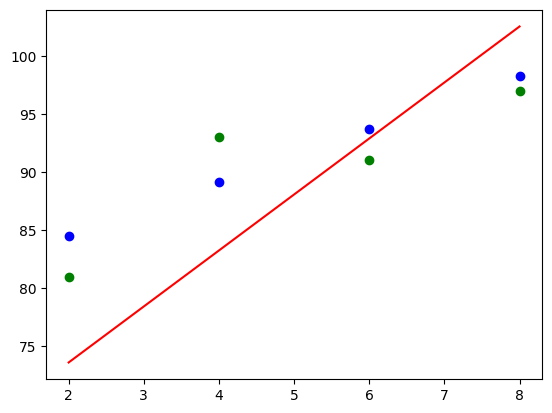

In [81]:
y_custom = 2.3 * X + 79.9 
y_pred = model.predict(X)
plt.scatter(X, y, c="green")
plt.scatter(X, y_custom, c="blue")
plt.plot(X, y_pred, "r")
plt.show()

In [ ]:
# AI 로봇과정
# Main : 로봇 -> 깊게 
# AI : 사용 가능하게(적용 가능하게)
# A : model1 쓰면 된다
# B : model2 쓰면 된다

In [83]:
# 로지스틱 회귀를 tensorflow에서 써 보
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
X = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

model = Sequential() # 딥 러닝 모델
model.add(Dense(1, input_dim=1, activation="sigmoid")) # 이 Layer를 통해 출력값이 하나다 (1)
model.compile(optimizer="sgd", loss="binary_crossentropy")
model.fit(X, y, epochs=500, verbose=0)

C:\ProgramData\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


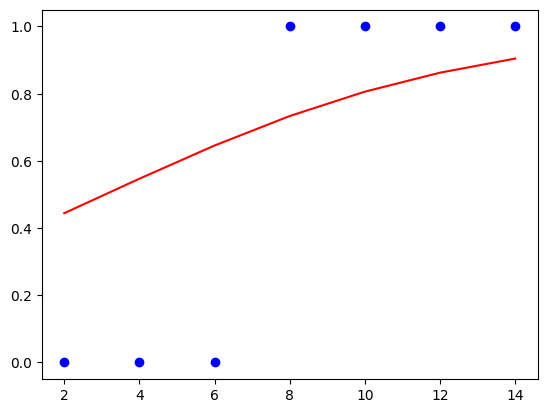

In [84]:
plt.scatter(X, y, c="blue")
y_pred = model.predict(X)
plt.plot(X, y_pred, "r")
plt.show()

In [103]:
model.predict(np.array([7]))

# tensorflow를 활용하여 예측
import tensorflow as tf
hour = 3
input_data = tf.constant([[hour]], dtype=tf.float32)
pred_prob = model.predict(input_data)[0][0]
print(f"{hour}시간 공부 시 합격 확률 : {pred_prob * 100}%")

# 합/불 여부
print("합격" if pred_prob >= 0.5 else "불합격")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3.1시간 공부 시 합격 확률 : 50.07233428955078%
합격


In [111]:
# 다층 퍼셉트론으로 XOR 해결하기
# 가중치, 바이어스
w11 = np.array([-2, -2]) # w1의 컬럼 1
w12 = np.array([2, 2]) # w1의 컬럼 2
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 다층 퍼셉트론(Multiple Layer Perceptron)
def MLP(x, w, b):
    # x = (1, 0)
    # w = (-2,
    #      -2)
    # b = 3
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# 최종 모델 XOR
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

In [112]:
xor_data = [(0, 0), (0, 1), (1, 0), (1, 1)]
for data in xor_data:
    print(f"{data} : {XOR(data[0], data[1])}")

(0, 0) : 0
(0, 1) : 1
(1, 0) : 1
(1, 1) : 0


In [120]:
# AND GATE를 퍼셉트론으로 구현해 보기
# (0, 0) : 0
# (0, 1) : 0
# (1, 0) : 0
# (1, 1) : 1

# y = w1 * x1 + w2 * x2 + b
w1 = 0.2
w2 = 6.3
b = 9
lr = 0.01

X = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 0, 0, 1])

# y값이 0 이상 -> 1
# y값이 0 미만 -> 0
def step_function(value):
    return 1 if value >= 0 else 0
epochs = 0
while True:
    error_count = 0 # 오차의 개수
    for x, yi in zip(X, y):
        y_pred = step_function(w1 * x[0] + w2 * x[1] + b)
        y_real = yi
        error = y_real - y_pred
    
        # 예측 -> 오차가 발생하면 바로바로 수정
        w1 = w1 + lr * error * x[0]
        w2 = w2 + lr * error * x[1]
        b = b + lr * error
        
        # 오차의 개수를 세자
        error_count += abs(error)

    epochs += 1
    # for 문 1바퀴 돈 후 error_count를 확인
    if error_count == 0:
        print(f"w1 : {w1}, w2 : {w2}, b : {b}, 학습 횟수 : {epochs}")
        break

w1 : 0.02000000000000031, w2 : 1.470000000000091, b : -1.4899999999998534, 학습 횟수 : 696


In [121]:
# OR GATE를 퍼셉트론으로 구현해 보기
# (0, 0) : 0
# (0, 1) : 1
# (1, 0) : 1
# (1, 1) : 1

# y = w1 * x1 + w2 * x2 + b
w1 = 0.2
w2 = 6.3
b = 9
lr = 0.01

X = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 1, 1, 1])

# y값이 0 이상 -> 1
# y값이 0 미만 -> 0
def step_function(value):
    return 1 if value >= 0 else 0
epochs = 0
while True:
    error_count = 0 # 오차의 개수
    for x, yi in zip(X, y):
        y_pred = step_function(w1 * x[0] + w2 * x[1] + b)
        y_real = yi
        error = y_real - y_pred
    
        # 예측 -> 오차가 발생하면 바로바로 수정
        w1 = w1 + lr * error * x[0]
        w2 = w2 + lr * error * x[1]
        b = b + lr * error
        
        # 오차의 개수를 세자
        error_count += abs(error)

    epochs += 1
    # for 문 1바퀴 돈 후 error_count를 확인
    if error_count == 0:
        print(f"w1 : {w1}, w2 : {w2}, b : {b}, 학습 횟수 : {epochs}")
        break

w1 : 0.2, w2 : 6.3, b : -0.009999999999852427, 학습 횟수 : 902


In [ ]:
# 여러 은닉층을 쌓으면서 역전파를 통해 가중치 업데이트를 거꾸로 진행하고 있었음
# 은닉층이 많으니 처음 쌓은 층(layer)의 가중치는 수정할 확률이 줄어듦
# -> 기울기 소실
# 해결하고자 Relu 활성화 함수를 도입
# 이전 시그모이드 함수에서는 여러 층을 진행하면 0 ~ 1로 출력 결과가 정해짐
# Relu는 양의 범위에서 원 데이터 (y=x) 정보를 갖고 있기 때문에 
# 상대적으로 가중치를 수정하기 위해 거슬러 올라오는 범위가 입력층까지 올 수 있게 됨

In [131]:
# 환경설정 이후에 돌렸었던 코드 다시 한 번 보자
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

dataset = np.loadtxt("robot/data/ThoraricSurgery3.csv", delimiter=",")
X = dataset[ :,  : 16]
y = dataset[ :, 16]

model = Sequential()
model.add(Dense(30, input_dim=16, activation="relu")) # 층마다 출력 결과 30개, feature 16개, 활성화 함수 relu
model.add(Dense(1, activation="sigmoid")) # 출력결과를 sigmoid 사용해서 0, 1 범위로 변환
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 모델에 대한 오차 -> MSE 제곱 평균 오차 대신에 로지스틱 회귀처럼 분류타입이므로 크로스 엔트로피 쓰자
# 오차를 수정해 나가는 방식을 경사하강법 최종 보스인 adam을 쓰자
# 평가 지표는 정확도
model.fit(X, y, epochs=50, verbose=1)

# 최종 결과 
# 학습한 모델을 가지고 다른 곳에서도 적용 가능!!
# 이 중 우리가 선정한 평가지표(정확도) 기준 
# 정확도가 가장 높은 모델, 가장 마지막 모델

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1489 - loss: 6.6972    
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4170 - loss: 1.4279 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8511 - loss: 0.5539 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.5512 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.4596 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.4464 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.4445 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8511 - loss: 0.4427 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8511 - loss: 0.4404 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4395 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.4378 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

In [132]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


In [148]:
# 정상-당뇨 판별 모델
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # pandas를 가져오는 이유 : 데이터 처리, jupyter notebook 상 시각화 용이

df = pd.read_csv("robot/data/pima-indians-diabetes3.csv")
df.head() # diabets 당뇨 : 1, 정상 : 0
df["diabetes"].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

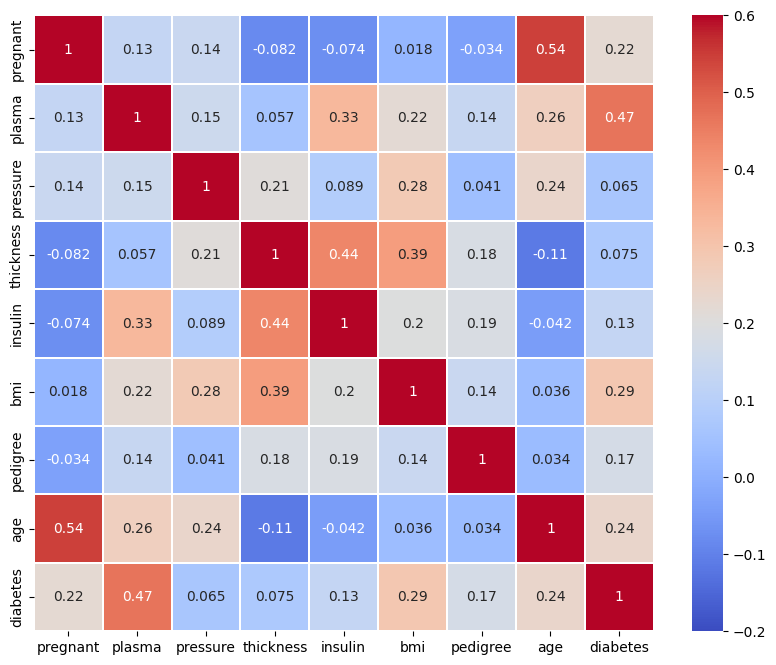

In [151]:
# 상관관계 계수(corr)를 seaborn활용해서 heatmap 찍어보자

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=0.6, vmin=-0.2, cmap="coolwarm", linewidths=0.1, annot=True)
plt.show()

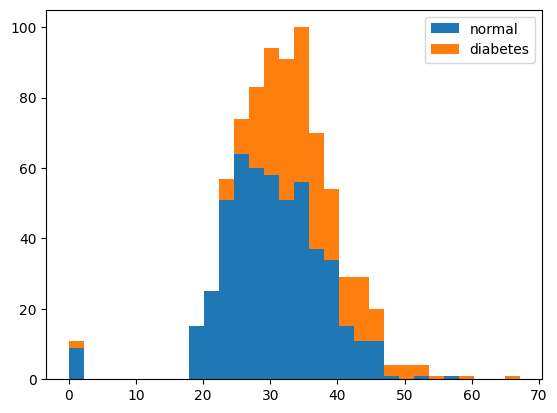

In [160]:
# 전처리
# 어떤 feature를 사용할 건지 
# plasma, bmi를 조금 더 명확하게 확인

# plasma기준 정상과 당뇨가 얼마나 있는지 히스토그램

# plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], histtype="barstacked", bins=30, label=["normal", "diabetes"])
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], histtype="barstacked", bins=30, label=["normal", "diabetes"])
plt.legend()
plt.show()

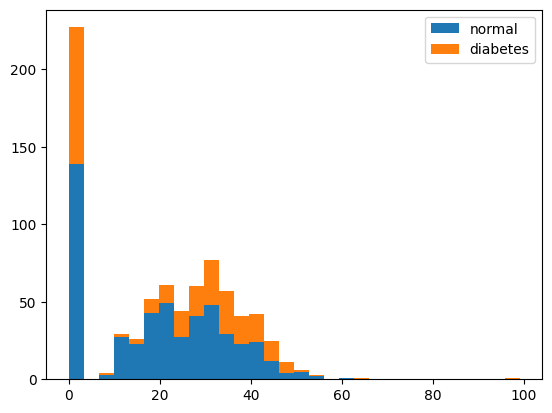

In [159]:
plt.hist(x=[df.thickness[df.diabetes==0], df.thickness[df.diabetes==1]], histtype="barstacked", bins=30, label=["normal", "diabetes"])
plt.legend()
plt.show()

In [167]:
# 경향성을 보이는 데이터 : plasma, bmi
# 8개의 feature를 가지고 학습
# 2개만 학습

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 1) 8개의 feature
X = df.iloc[ : , : 8]
y = df.iloc[ : , 8]

model = Sequential()
model.add(Dense(16, input_dim=8, activation="relu", name="Dense1"))
model.add(Dense(8, activation="relu", name="Dense2"))
model.add(Dense(1, activation="sigmoid", name="Dense3"))

# 오차, 오차 수정
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=50) # 최종 정확도 0.7057

Epoch 1/50


C:\ProgramData\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5052 - loss: 4.0102
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5247 - loss: 2.8316 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 2.0772 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5117 - loss: 1.6223 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - loss: 1.3923 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5091 - loss: 1.2451 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5182 - loss: 1.1428 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 1.0431 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5391 - loss: 0.9786 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5273 - loss: 0.9303 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5846 - loss: 0.8696 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5781 - los

In [165]:
# 경향성을 보이는 데이터 : plasma, bmi
# 8개의 feature를 가지고 학습
# 2개만 학습

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 1) 8개의 feature
X = df.loc[:, ["plasma", "bmi"]]
y = df.iloc[ : , 8]

model = Sequential()
model.add(Dense(4, input_dim=2, activation="relu", name="Dense1"))
model.add(Dense(4, activation="relu", name="Dense2"))
model.add(Dense(1, activation="sigmoid", name="Dense3"))

# 오차, 오차 수정
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=50) # 최종 정확도 0.6510

Epoch 1/50


C:\ProgramData\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6510 - loss: 0.6739
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6510 - loss: 0.6717 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6708 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6703 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6695 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6711 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6676 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6674 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6510 - loss: 0.6668 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6510 - loss: 0.6661 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6649 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - los